In [1]:
using DifferentialEquations
using Plots

In [2]:
# Problem definition
function competition(u0, p, t)
    x, y = u0 # Initial populations sizes
    dx = p.R*x - p.A*x*x - p.B*x*y # variation of the x population
    dy = p.r*y - p.a*y*y - p.b*x*y # variation of the y population
    return [dx, dy]
end

competition (generic function with 1 method)

In [6]:
# Expression of the zero growth isoclines

# Eq 1
x_hat_1 = 0
y_hat_1 = 0

# Eq 2
x_hat_2 = R/A
y_hat_2 = 0

# Eq 3
x_hat_3 = 0
y_hat_3 = r/a

#Eq 4
x_hat_4 = (r*B-R*a)/(B*b-A*a)
y_hat_4 = (R*b-r*A)/(B*b-A*a)

UndefVarError: UndefVarError: R not defined

In [11]:
# Finding when equilibrium with specie x is possible


# Finding when equilibrium with specie y is possible


# Finding when equilibrium with both species is possible
# Initial population sizes 
u0 = [0.1, 0.1]

# t0 - t end
t = (0., 100.)

function eq_2_sp(p)
    k = p.B*p.b-p.A*p.a
    x̂ = (p.B*p.r - p.R*p.a)/k 
    ŷ = (p.b*p.R - p.r*p.A)/k 
    return (x̂, ŷ)
end

eq_2_sp_exists(p) = all(eq_2_sp(p).>1e-3)

# Grid for the search 
possible_values = 0.9:0.05:1.1

# Empty array for parameter values 
p_eq = []

# Grid search
for a in possible_values, A in possible_values
    for b in possible_values, B in possible_values
        p = (r=1.0, R=1.0, a=a, A=A, b=b, B=B)
        push!(p_eq, p) 
    end
end

# Keep only parameters for which the 2sp equilibrium exists 
filter!(eq_2_sp_exists, p_eq)


200-element Array{Any,1}:
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 0.95, B = 0.95)
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 0.95, B = 1.0) 
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 0.95, B = 1.05)
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 0.95, B = 1.1) 
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.0, B = 0.95) 
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.0, B = 1.0)  
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.0, B = 1.05) 
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.0, B = 1.1)  
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.05, B = 0.95)
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.05, B = 1.0) 
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.05, B = 1.05)
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.05, B = 1.1) 
 (r = 1.0, R = 1.0, a = 0.9, A = 0.9, b = 1.1, B = 0.95) 
 ⋮                                                       
 (r = 1.0, R = 1.0, a = 1.1, A = 1.1, b = 0.95, B = 0.9) 
 (r = 1.0, R = 1.0, a = 1.1, A = 1.1, b = 0.95, B = 0.95)
 (r = 1.0, R = 1.0, a = 1.1, A = 1.1, b = 0.95

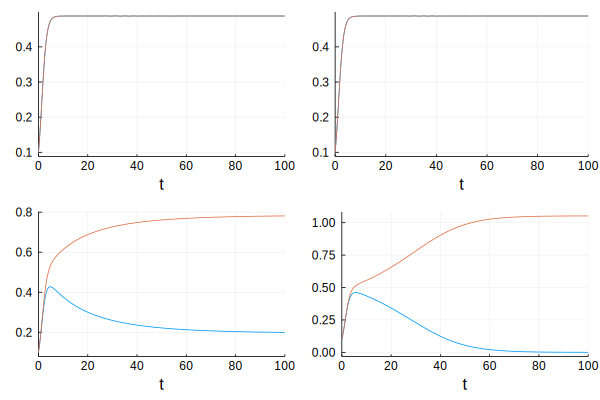

In [12]:
# simulation of 4 combinaisons of parameters
solution_graph = []
for z in 1:4
    # Parameters
    p = rand(p_eq)

    # Definition of problem
    prob = ODEProblem(competition, u0, t, p)

    # Resolution of problem
    solution = solve(prob)
    push!(solution_graph, solution)

end

    # Plot
p1 = plot(solution_graph[1])
p2 = plot(solution_graph[2])
p3 = plot(solution_graph[3])
p4 = plot(solution_graph[4])
plot(p1,p2,p3,p4,layout=(2,2),legend=false)
    #plot(solution)
    #plot(solution, vars=(1,2), xlab="x", ylab="y", aspectratio=1, xlim=(0,1), ylim=(0,1))
    #scatter!([u0[1]], [u0[2]], c=:black, lab="u0")

In [27]:
print(solution_graph)

Any[retcode: Success
Interpolation: Automatic order switching interpolation
t: [0.0, 0.10477225164220479, 0.42850120285921317, 0.9109153151914, 1.5998265543685573, 2.3059123100772547, 3.148249789197113, 4.399013028957808, 5.264986265092091, 6.525696671540797, 7.7552944757278155, 9.377521890219258, 11.216145281938118, 13.63979533277453, 16.69936126790245, 20.729824467174456, 25.320086908878864, 29.72526874491737, 33.63499879894242, 37.126818998358914, 40.39854039941497, 43.63278769973334, 46.94254524099475, 50.36376589570767, 53.87405495801511, 60.973079650057834, 68.44849020244362, 78.00336921481424, 91.0785840130191, 110.49345583519208, 142.17804096468052, 200.32466967676112, 328.80587891629284, 496.8623135648231, 500.0]
u: Array{Float64,1}[[0.1, 0.1], [0.10864561913169446, 0.10864561913169446], [0.13866013047405112, 0.13866013047405118], [0.19167195549089935, 0.19167195549089933], [0.2765907501698469, 0.276590750169847], [0.35748253291267656, 0.35748253291267673], [0.4267273837560691